In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import scipy.stats
import numpy as np
import scanpy.api as sc

import diffxpy.api as de

# Generate some data:

In [2]:
from batchglm.api.models.glm_nb import Simulator

sim = Simulator(num_observations=2000, num_features=100)
sim.generate_sample_description(num_batches=0, num_conditions=2)
sim.generate_params()
sim.generate_data()

Create anndata object:

In [3]:
adata = sc.AnnData(X=np.asarray(sim.X), obs=sim.sample_description)

From here on, we can treat the anndata object as a container of the count matrix, the sample_description and the gene_names and we only pass adata to the diffxpy functions.

# Run differential expression test:

The t-test checks if two groups of samples differ significantly in one gene.

Therefore, it has to be provided with a parameter `grouping` which specifies the group membership of each sample.
It can be either the name of a column in `sample_description` or a vector of length `num_observations`.


In [4]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

test = de.test.t_test(
    data=adata,
    grouping="condition",
    batch_size=100,
    training_strategy="DEFAULT",
    dtype="float64"
)

# Obtaining the results

The p-/q-values can be obtained by calling test.pval / test.qval:

In [5]:
test.qval[:10]

array([1.09266674e-02, 0.00000000e+00, 0.00000000e+00, 2.00794744e-04,
       1.24125295e-03, 0.00000000e+00, 0.00000000e+00, 3.65063171e-12,
       4.55823574e-07, 0.00000000e+00])

test.summary() returns a pandas DataFrame with a quick overview of the test results:

In [6]:
test.summary().iloc[:10,:]

,gene,pval,qval,log2fc,mean,zero_mean,zero_variance
0,0,9.069134e-03,1.092667e-02,0.133989,511.510986,False,False
1,1,0.000000e+00,0.000000e+00,0.725978,699.494019,False,False
2,2,0.000000e+00,0.000000e+00,0.561748,634.283997,False,False
3,3,1.505961e-04,2.007947e-04,-0.332096,515.728516,False,False
4,4,9.805898e-04,1.241253e-03,-0.219954,468.810486,False,False
5,5,0.000000e+00,0.000000e+00,0.783537,739.226501,False,False
6,6,0.000000e+00,0.000000e+00,0.898553,702.452515,False,False
7,7,2.226885e-12,3.650632e-12,-0.622746,413.104004,False,False
8,8,3.236347e-07,4.558236e-07,-0.260237,457.139496,False,False
9,9,0.000000e+00,0.000000e+00,0.899181,696.380005,False,False


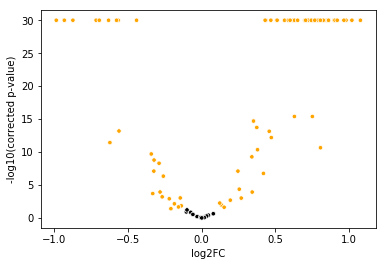

In [7]:
test.plot_volcano()